In [1]:
import os
import re
import sys
import json
import codecs
import locale
import logging
import requests
import datetime as dt
from typing import Union, Optional, Tuple, List, cast

from matplotlib import pyplot as plt    # type: ignore  
import matplotlib.gridspec as gridspec  # type: ignore 

import pandas as pd
import numpy as np

In [2]:
#----------------------------------------------------------------
# Configurations section
#----------------------------------------------------------------

temp_content_dir = os.path.join(os.sep, 'tmp')
images_path = os.path.join("..","images")

now = dt.datetime.now()
sample_date = now.strftime("%d/%m/%Y")

locale.setlocale(locale.LC_ALL, 'it_IT.UTF-8')

ok_statuses = [200, 201, 202]
data_file_path = os.path.join(os.sep,"tmp")
data_file_name = "MvtC2CGateway-C2C-only_20180516_153201-.jtl"
csv_data_file = os.path.join(data_file_path, data_file_name)


In [3]:
#----------------------------------------------------------------
# Import the procedures that download and transform the pdf file
# into a dataframe.
#----------------------------------------------------------------

module_path = os.path.abspath(os.path.join('..','src'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

from logger_init     import init_logger    
from result_value    import ResultValue, ResultOk, ResultKo    
from ChartTools      import text_box    
from CreateReport    import get_dataframe_from_csv
from CreateReport    import get_dataframe_from_csv
from CreateReport    import elapsed_chart
from CreateReport    import threads_chart
from CreateReport    import picture_title_text
from CreateReport    import create_label_dict
from CreateReport    import get_global_statistics
from CreateReport    import statistics_box_text
from CreateReport    import elapsed_binned_chart


/home/giovanni/code-personal/python/JMeter_report/src


In [4]:
df_dict = get_dataframe_from_csv(csv_data_file, ok_codes=ok_statuses)
if df_dict.is_ok() == False:
    assert False, df_dict()

df = df_dict()["df"]
df_errors = df_dict()["errors_df"]
df_binned = df_dict()["binned_elapsed"]

global_stats = get_global_statistics(df=df_dict()["df"], errors_df=df_dict()["errors_df"])
time_limits = [global_stats()["test begin"] - pd.Timedelta(minutes=0.5) 
              ,global_stats()["test end"]   + pd.Timedelta(minutes=0.5)]

labels = create_label_dict(language="en")()


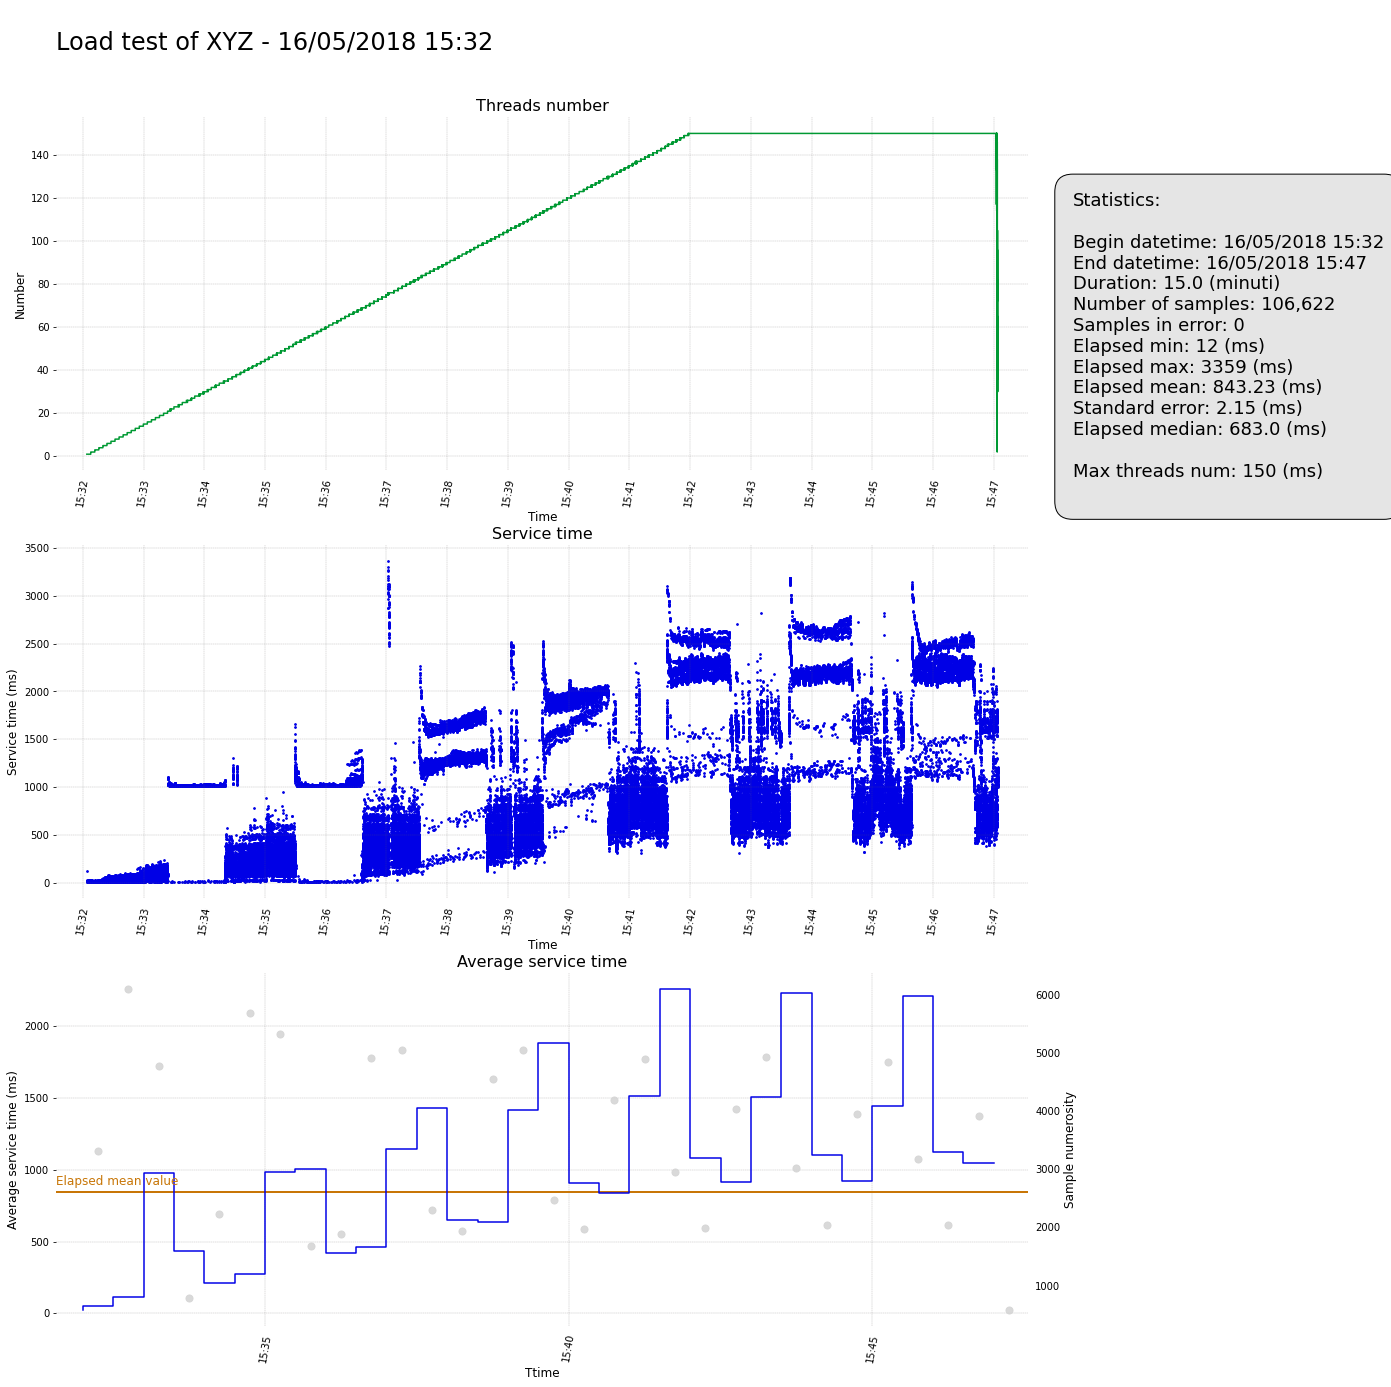

In [5]:
fig0 = plt.figure(figsize=(21, 40)) #, constrained_layout=True)

gs1 = gridspec.GridSpec(6, 2
                       ,figure=fig0
                       ,hspace=0.25
                       ,wspace=0.01 
                       ,height_ratios=[1, 10, 10, 10, 10, 10]
                       ,width_ratios=[10, 2])
ax = []

idx = 0
ax.append(fig0.add_subplot(gs1[0,0]))
text = picture_title_text(labels["picture_title"][0],  global_stats())
if text.is_ok() == True:
    text_box(ax[idx], text(), fontsize=labels["picture_title"][1])
    
idx += 1
ax.append(fig0.add_subplot(gs1[1,0]))
threads_chart(ax=ax[idx], df=df, labels=labels, time_limits=time_limits)

idx += 1
ax.append(fig0.add_subplot(gs1[1, 1]))
stats_txt = statistics_box_text(global_stats(), labels)
if text.is_ok() == True:
    text_box(ax[idx], stats_txt(), fontsize=labels['statistics'][1], y=0.35, colors=["#e5e5e5", "#000000", "#000000"],x=0.2)

idx += 1
ax.append(fig0.add_subplot(gs1[2,0]))
elapsed_chart(ax=ax[idx], df=df, errors_df=df_errors, labels=labels, time_limits=time_limits)

idx += 1
ax.append(fig0.add_subplot(gs1[3,0]))
elapsed_binned_chart(ax[idx]
                    ,binned_df=df_binned
                    ,global_statistics=global_stats()
                    ,labels=labels
                    ,time_limits=time_limits)


In [19]:
picture_title_text(labels()["picture_title"][0],  global_stats())()

'Test di carico per XYZ - 16/05/2018 15:32'